# Analysis of IMDB Data

We will analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data. This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) although we have taken steps to pull this data into a publis s3 bucket: 

* s3://cis9760-lecture9-movieanalysis/name.basics.tsv ---> Name Basics
* s3://cis9760-lecture9-movieanalysis/title.basics.tsv ---> Title Basics
* s3://cis9760-lecture9-movieanalysis/title.principals.tsv ---> Title Principles
* s3://cis9760-lecture9-movieanalysis/title.ratings.tsv ---> Title Ratings

# Content

**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [1]:
%%info

Let's install the necessary packages here

In [2]:
sc.install_pypi_package("pandas==1.0.5")
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1702427128802_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now, import the installed packages from the previous block below.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

Load all data from S3 into a Spark dataframe object 

In [4]:
name = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv', sep=r'\t', header=True)
titles = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv', sep=r'\t', header=True)
principles = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv', sep=r'\t', header=True)
ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv', sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Name Basics

Display the schema below:

In [5]:
name.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the first 5 rows with the following columns:

* `primaryName`
* `birthYear`
* `deathYear`
* `knownForTitles`

In [6]:
name.select('primaryName', 'birthYear', 'deathYear', 'knownForTitles').show(5, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+---------------------------------------+
|primaryName    |birthYear|deathYear|knownForTitles                         |
+---------------+---------+---------+---------------------------------------+
|Fred Astaire   |1899     |1987     |tt0050419,tt0053137,tt0072308,tt0043044|
|Lauren Bacall  |1924     |2014     |tt0071877,tt0117057,tt0038355,tt0037382|
|Brigitte Bardot|1934     |\N       |tt0054452,tt0049189,tt0059956,tt0057345|
|John Belushi   |1949     |1982     |tt0077975,tt0072562,tt0080455,tt0078723|
|Ingmar Bergman |1918     |2007     |tt0069467,tt0050976,tt0083922,tt0050986|
+---------------+---------+---------+---------------------------------------+
only showing top 5 rows

## Title Basics

Display the first 15 rows with the following columns:
    
* `titleType`
* `primaryTitle`
* `genres`

In [7]:
titles.select('titleType', 'primaryTitle', 'genres').show(15, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------------------------------------+------------------------+
|titleType|primaryTitle                               |genres                  |
+---------+-------------------------------------------+------------------------+
|short    |Carmencita                                 |Documentary,Short       |
|short    |Le clown et ses chiens                     |Animation,Short         |
|short    |Pauvre Pierrot                             |Animation,Comedy,Romance|
|short    |Un bon bock                                |Animation,Short         |
|short    |Blacksmith Scene                           |Comedy,Short            |
|short    |Chinese Opium Den                          |Short                   |
|short    |Corbett and Courtney Before the Kinetograph|Short,Sport             |
|short    |Edison Kinetoscopic Record of a Sneeze     |Documentary,Short       |
|movie    |Miss Jerry                                 |Romance                 |
|short    |Exiting the Facto

Display the unique titles below:

In [8]:
titles.select('titleType').distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

Display the schema below:

In [9]:
titles.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Title Principles

Display the schema below:

In [10]:
principles.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Display the first 15 rows where the "category" column is "self"

In [11]:
principles.filter(principles.category == 'self').show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+--------+---+--------------------+
|   tconst|ordering|   nconst|category|job|          characters|
+---------+--------+---------+--------+---+--------------------+
|tt0000001|       1|nm1588970|    self| \N|         ["Herself"]|
|tt0000012|       1|nm2880396|    self| \N|         ["Herself"]|
|tt0000012|       2|nm9735580|    self| \N|         ["Himself"]|
|tt0000012|       3|nm0525900|    self| \N|         ["Herself"]|
|tt0000012|       4|nm9735581|    self| \N|         ["Herself"]|
|tt0000012|       7|nm9735579|    self| \N|         ["Herself"]|
|tt0000012|       8|nm9653419|    self| \N|         ["Herself"]|
|tt0000013|       1|nm0525908|    self| \N|         ["Himself"]|
|tt0000013|       2|nm1715062|    self| \N|         ["Himself"]|
|tt0000016|       1|nm0525900|    self| \N|["Herself (on the...|
|tt0000016|       2|nm9735581|    self| \N|["Herself (on the...|
|tt0000024|       1|nm0256651|    self| \N|["Herself - Empre...|
|tt0000024|       2|nm043

## Title Ratings

Display the schema below:

In [12]:
ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

Display the first 10 rows in a descending order by the number of votes

In [13]:
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType

ratings = ratings.withColumn('numVotes', ratings.numVotes.cast(FloatType()))
ratings.sort(col('numVotes').desc()).show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+---------+
|   tconst|averageRating| numVotes|
+---------+-------------+---------+
|tt0111161|          9.3|2159745.0|
|tt0468569|          9.0|2134602.0|
|tt1375666|          8.8|1892958.0|
|tt0137523|          8.8|1725444.0|
|tt0110912|          8.9|1695159.0|
|tt0109830|          8.8|1662609.0|
|tt0944947|          9.4|1606096.0|
|tt0133093|          8.7|1554345.0|
|tt0120737|          8.8|1548920.0|
|tt0167260|          8.9|1533632.0|
|tt0068646|          9.2|1482225.0|
|tt1345836|          8.4|1421506.0|
|tt0167261|          8.7|1387208.0|
|tt0816692|          8.6|1348184.0|
|tt0114369|          8.6|1327441.0|
+---------+-------------+---------+
only showing top 15 rows

# Overview of Data

Display the number of rows and columns in each dataFrame object.

In [14]:
print('Number of columns in Name Basics table: ', len(name.columns))
print('Number of rows in Names Basics table: ', name.count(), '\n')

print('Number of columns in Title Basics table: ', len(titles.columns))
print('Number of rows in Title Basics table: ', titles.count(), '\n')

print('Number of columns in Title Principles table: ', len(principles.columns))
print('Number of rows in Title Principles table: ', principles.count(), '\n')

print('Number of columns in Title Ratings table: ', len(ratings.columns))
print('Number of rows in Title Ratings table: ', ratings.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Name Basics table:  6
Number of rows in Names Basics table:  9706922 

Number of columns in Title Basics table:  9
Number of rows in Title Basics table:  6321302 

Number of columns in Title Principles table:  6
Number of rows in Title Principles table:  36468817 

Number of columns in Title Ratings table:  3
Number of rows in Title Ratings table:  993153

# PART 2 - Analyzing Genres

Let's now answer this question: how many unique genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from the data set

In [15]:
genres = titles.select('tconst', 'titleType', 'genres')
genres.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

Display the first 10 rows of your association table below

In [16]:
from pyspark.sql.functions import split, col, explode

genre_split = genres.withColumn('genre', explode(split('genres', ",")))
genre_split.select('tconst', 'titleType', 'genre').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|      genre|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

## Total Unique Genres

**What is the total number of unique genres available in the movie title type?**

In [17]:
genre_split.select('genre').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

**What are the unique genres available?**

In [18]:
genre_split.select('genre').distinct().show(29, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|\N         |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

**Oops! Something is off!**

In [19]:
from pyspark.sql.functions import col

nll = '\\N'
genre_split = genre_split.filter(col('genre') != nll)
genre_split.select('genre').distinct().show(28, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

## Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

### Average Rating / Genre

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First, let's join our two dataframes (movie ratings and genres) by tconst

In [20]:
movies_ratings = ratings.join(genre_split, 'tconst').filter(col('titleType') == 'movie')
movies_ratings.select('genre', 'averageRating').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|    genre|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|Biography|          4.1|
|    Drama|          4.1|
|  History|          4.1|
|    Drama|          5.7|
|    Drama|          4.6|
|  History|          4.6|
|Biography|          6.3|
|    Drama|          6.3|
+---------+-------------+
only showing top 10 rows

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

In [21]:
from pyspark.sql.functions import avg

#Aggregate along averageRating column 
movies_ratings = movies_ratings.withColumn('averageRating', movies_ratings.averageRating.cast(FloatType()))
avg_movies_ratings = movies_ratings.groupBy('genre').agg(avg('averageRating'))

#Rename aggregate average rating column
avg_movies_ratings = avg_movies_ratings.withColumnRenamed('avg(averageRating)', 'avg_rating')
avg_movies_ratings.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|genre      |avg_rating       |
+-----------+-----------------+
|Mystery    |5.940437537126316|
|Musical    |6.203246053185319|
|Action     |5.718734067904495|
|Sport      |6.600145190943391|
|Romance    |6.125714179294426|
|Thriller   |5.625967567519544|
|Family     |6.250560452699635|
|Fantasy    |5.924820762891499|
|History    |6.822718117193864|
|Animation  |6.326203749467441|
|Film-Noir  |6.636246780503378|
|Sci-Fi     |5.325150006900168|
|News       |7.200916040944689|
|Drama      |6.288080211097538|
|Documentary|7.245469805371099|
|Western    |5.948970991005059|
|Comedy     |5.941363107822231|
|Crime      |6.026013333109149|
|War        |6.483807036278403|
|Adult      |5.721742579082059|
+-----------+-----------------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [22]:
avg_movies_ratings.sort(col('avg_rating').desc()).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|genre      |avg_rating       |
+-----------+-----------------+
|Short      |7.259999942779541|
|Documentary|7.245469805371099|
|News       |7.200916040944689|
|Biography  |6.983637643044585|
|Game-Show  |6.974999904632568|
|History    |6.822718117193864|
|Music      |6.752020207214588|
|Film-Noir  |6.636246780503378|
|Sport      |6.600145190943391|
|War        |6.483807036278403|
|Reality-TV |6.379310377712907|
|Animation  |6.326203749467441|
|Drama      |6.288080211097538|
|Family     |6.250560452699635|
|Musical    |6.203246053185319|
|Romance    |6.125714179294426|
|Crime      |6.026013333109149|
|Western    |5.948970991005059|
|Comedy     |5.941363107822231|
|Mystery    |5.940437537126316|
+-----------+-----------------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

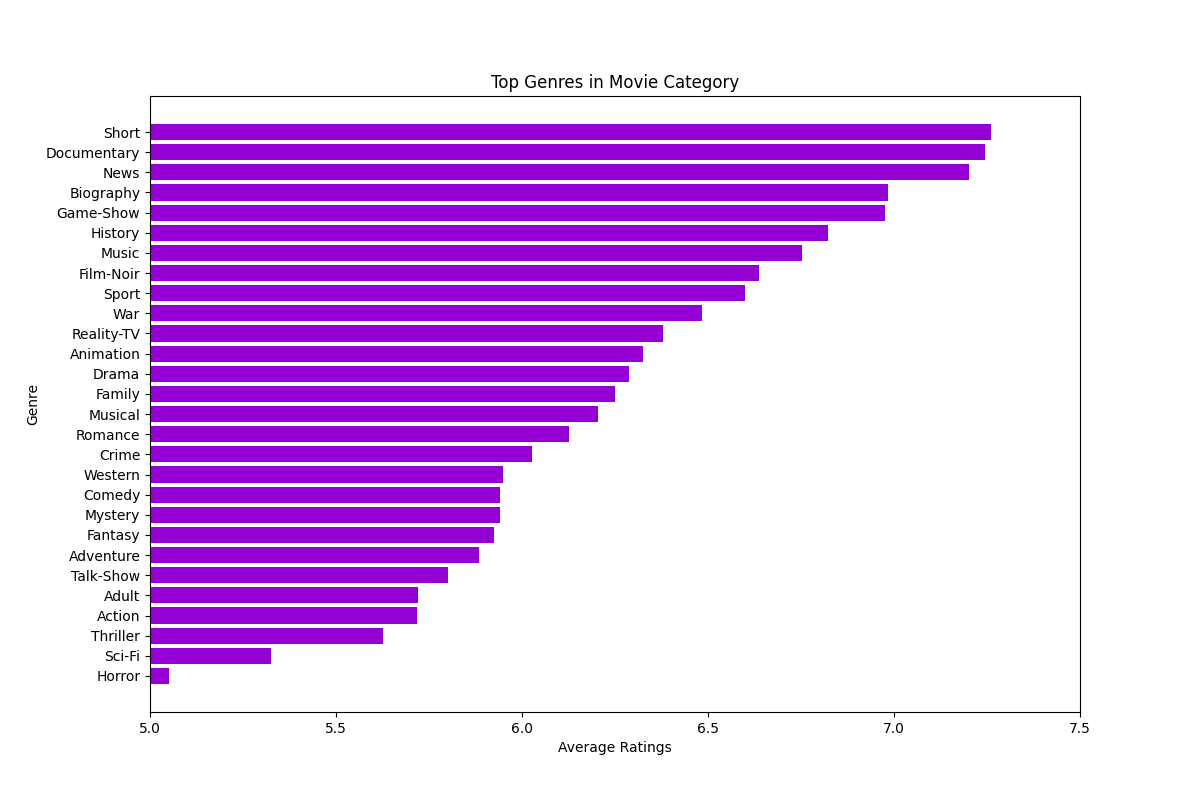

In [23]:
pd_df1 = avg_movies_ratings.sort(col('avg_rating').asc()).toPandas()

plt.figure(figsize=(12, 8))
plt.barh(pd_df1.genre, pd_df1.avg_rating, color='darkviolet', label='avg_rating')
plt.xlabel('Average Ratings')
plt.ylabel('Genre')
plt.xlim([5.0, 7.5])
plt.title('Top Genres in Movie Category')
%matplot plt

## PART 3 - Analyzing Job Categories

## Total Unique Job Categories

**What is the total number of unique job categories?**

In [24]:
principles.select('tconst', 'category').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [25]:
principles.select('category').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

**What are the unique job categories available?**

In [26]:
principles.select('category').distinct().show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|category           |
+-------------------+
|actress            |
|producer           |
|production_designer|
|writer             |
|actor              |
|cinematographer    |
|archive_sound      |
|archive_footage    |
|self               |
|editor             |
|composer           |
|director           |
+-------------------+

## Top Job Categories

Now let's find the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [27]:
from pyspark.sql.functions import count

cats_count = principles.groupBy('category').count()
cats_count.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|category           |count  |
+-------------------+-------+
|actress            |6325097|
|producer           |2197866|
|production_designer|285924 |
|writer             |4811596|
|actor              |8493701|
|cinematographer    |1300404|
|archive_sound      |2143   |
|archive_footage    |209035 |
|self               |6153089|
|editor             |1197669|
|composer           |1313187|
|director           |4179106|
+-------------------+-------+

### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [28]:
cats_count_sorted = cats_count.sort(col('count').desc())
cats_count_sorted.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|category           |count  |
+-------------------+-------+
|actor              |8493701|
|actress            |6325097|
|self               |6153089|
|writer             |4811596|
|director           |4179106|
|producer           |2197866|
|composer           |1313187|
|cinematographer    |1300404|
|editor             |1197669|
|production_designer|285924 |
|archive_footage    |209035 |
|archive_sound      |2143   |
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

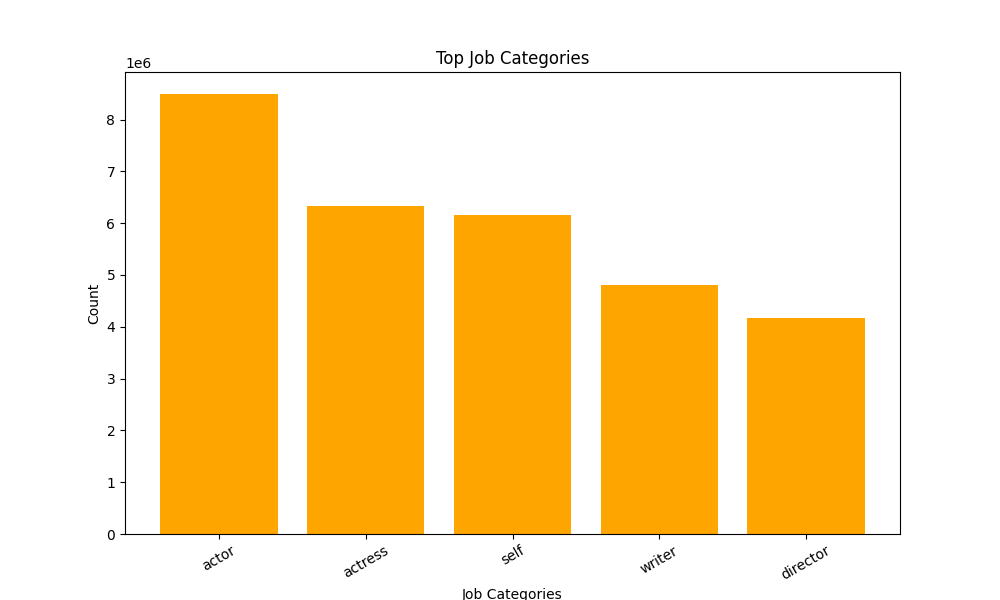

In [29]:
pd_df = cats_count_sorted.limit(5).toPandas()

plt.figure(figsize=(10, 6))
plt.bar(pd_df['category'], pd_df['count'], color='orange', label='count')
#pd_df.plot(kind='bar', x='category', y='count', color="orange")
plt.xlabel('Job Categories')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.title('Top Job Categories')

%matplot plt

# PART 4 - Answer to the following questions:

You will need to join tables to answer the following questions.
Your code should meet all the requirements given in the question.

## 1) What are the movies in which both Johnny Depp and Helena Bonham Carter have acted together?

In [30]:
names_principles = name.join(principles, 'nconst')
names_principles_titles = names_principles.join(titles, 'tconst')

#Create a dataframe for movies that Johnny Depp acted in
jd = names_principles_titles.select('primaryTitle') \
    .filter((col('primaryName')=='Johnny Depp') & (col('titleType')=='movie'))

#Create a dataframe for movies that Helena Bonham Carter acted in
hbc = names_principles_titles.select('primaryTitle') \
    .filter((col('primaryName')=='Helena Bonham Carter') & (col('titleType')=='movie'))

#Join the two dataframes together and display the result
jd_hbc = jd.join(hbc, 'primaryTitle')
jd_hbc.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|primaryTitle                                  |
+----------------------------------------------+
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Corpse Bride                                  |
|Charlie and the Chocolate Factory             |
|Alice in Wonderland                           |
|Alice Through the Looking Glass               |
+----------------------------------------------+

## 2) What are the movies in which Brad Pitt has acted since 2010?

In [31]:
bp = names_principles_titles.select('primaryTitle', 'startYear') \
    .filter((col('primaryName') == 'Brad Pitt') \
            & (col('titleType') == 'movie') \
            & (col('startYear') > 2010) \
            & (col('category')=='actor'))

bp.sort(col('startYear').desc()).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|Babylon                          |2021     |
|Once Upon a Time ... in Hollywood|2019     |
|Ad Astra                         |2019     |
|War Machine                      |2017     |
|Allied                           |2016     |
|The Big Short                    |2015     |
|By the Sea                       |2015     |
|Fury                             |2014     |
|World War Z                      |2013     |
|12 Years a Slave                 |2013     |
|Killing Them Softly              |2012     |
|The Tree of Life                 |2011     |
|Moneyball                        |2011     |
+---------------------------------+---------+

## 3) How many movies has Zendaya acted in each year?

In [32]:
zd = names_principles_titles.select('startYear') \
    .filter((col('primaryName') == 'Zendaya') & (col('titleType') == 'movie') & (col('startYear') != nll))

zd.groupBy('startYear').count().sort(
    col('startYear').desc()).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|2020     |1    |
|2018     |2    |
|2017     |1    |
+---------+-----+

## 4) Which movies, released in 2019, have an average rating exceeding 9.7?

In [33]:
ratings_titles = titles.join(ratings, 'tconst')
ratings_titles = ratings_titles.withColumn(
    'averageRating', ratings_titles.averageRating.cast(FloatType()))

ratings_titles.select('primaryTitle', 'averageRating') \
    .filter((col('startYear')==2019) & (col('averageRating')>9.7) & (col('titleType')=='movie')) \
    .sort(col('averageRating').desc())\
    .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|primaryTitle                                     |averageRating|
+-------------------------------------------------+-------------+
|Bu Can Var Oldugu Sürece                         |10.0         |
|L'Enfant Terrible                                |10.0         |
|A Grunt's Life                                   |10.0         |
|Kirket                                           |10.0         |
|Our Scripted Life                                |10.0         |
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|The Butcher Baronet                              |10.0         |
|A Medicine for the Mind                          |10.0         |
|Love in Kilnerry                                 |10.0         |
|Superhombre                                      |9.9          |
|Puritan: All of Life to The Glory of God         |9.9          |
|The Cardinal                                     |9.9          |
|Square On

## 5) Among the titles in which Clint Eastwood and Harrison Ford have acted, who has the higher average rating?

First, calculate the average rating of each actor and then show the actor with higher average rating.

In [34]:
ratings_titles_principles = ratings_titles.join(principles, 'tconst')
all_df = ratings_titles_principles.join(name, 'nconst')

#Create a dataframe for titles Clint Eastwood acted in and aggregate along averageRating
ce = all_df.select('primaryName', 'averageRating', 'category') \
    .filter((col('primaryName')=='Clint Eastwood') & (col('category')=='actor')) \
    .groupBy('primaryName').agg(avg('averageRating'))

#Create a dataframe for titles Harrison Ford acted in and aggregate along averageRating
hf = all_df.select('primaryName', 'averageRating', 'category') \
    .filter((col('primaryName')=='Harrison Ford') & (col('category')=='actor')) \
    .groupBy('primaryName').agg(avg('averageRating'))

#Collect the average ratings for both actors
ce_rating = ce.collect()[0][1]
hf_rating = hf.collect()[0][1]

#Print the results
print(f'The average rating of Harrison Ford is {hf_rating:.2f}')
print(f'The average rating of Clint Eastwood is {ce_rating:.2f}')

if ce_rating > hf_rating:
    print('Clint Eastwood has a higher average rating')
else:
    print('Harrison Ford has a higher average rating')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The average rating of Harrison Ford is 6.75
The average rating of Clint Eastwood is 7.71
Clint Eastwood has a higher average rating

## 6) What is the movie(s) with the highest average rating among those in which Chris Evans has acted?

Write your code in a way that it finds and displays all movies with the highest rating, even if there's more than one. 

In [35]:
chris_evans = all_df.select('primaryTitle', 'averageRating') \
    .filter((col('primaryName')=='Chris Evans') & (col('category')=='actor') & (col('titleType')=='movie'))

chris_evans.sort(col('averageRating').desc()).show(2, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+-------------+
|primaryTitle          |averageRating|
+----------------------+-------------+
|Avengers: Infinity War|8.5          |
|Avengers: Endgame     |8.5          |
+----------------------+-------------+
only showing top 2 rows

## 7) What is the percentage of adult titles in which actors and actresses have acted?

In [36]:
#Subset of actors and actresses
actors = all_df.filter(col('category') == 'actor')
actresses = all_df.filter(col('category') == 'actress')

#Count total actors and actresses
count_actors = actors.count()
count_actresses = actresses.count()

#Count adult actors and actresses
adult_actors = actors.filter(col('isAdult') == 1)
adult_actresses = actresses.filter(col('isAdult') == 1)

#Calcuate the percentages
percent_adult_actors = (adult_actors.count() / count_actors) * 100
percent_adult_actresses = (adult_actresses.count() / count_actresses) * 100

#Print results
print(f'The percentage of adult titles actors have acted is: {percent_adult_actors:.2f}%')
print(f'The percentage of adult titles actresses have acted is: {percent_adult_actresses:.2f}%')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The percentage of adult titles actors have acted is: 2.14%
The percentage of adult titles actresses have acted is: 5.33%

## 8) What are the top 10 movie genres with the shortest average runtime?

You do not need to join tables in this question.

In [37]:
genre_split = titles.withColumn('genre', explode(split(
    'genres', ","))).filter(col('genre') != nll)
genre_split = genre_split.withColumn(
    'runtimeMinutes', genre_split.runtimeMinutes.cast(FloatType()))

genre_split.filter(col('titleType')=='movie') \
    .groupBy('genre').agg(avg('runtimeMinutes')) \
    .sort(col('avg(runtimeMinutes)').asc()) \
    .show(10, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------------------+
|genre      |avg(runtimeMinutes)|
+-----------+-------------------+
|Short      |18.666666666666668 |
|News       |66.84965437788019  |
|Documentary|72.67815675360818  |
|Reality-TV |76.28              |
|Adult      |77.181711376542    |
|Western    |79.35924285138945  |
|Talk-Show  |79.43333333333334  |
|Animation  |80.74658828469452  |
|Biography  |81.05191321499014  |
|Film-Noir  |83.75703324808184  |
+-----------+-------------------+
only showing top 10 rows

## 9) What are the most common character names for actors and actresses in Romance movies?

In [38]:
genre_principles = genre_split.join(principles, 'tconst')
genre_principles_names = genre_principles.join(name, 'nconst')

rom_movies = genre_principles_names.filter((col('genre') == 'Romance') \
                                           & (col('titleType') == 'movie') \
                                           & ((col('category') == 'actor') | (col('category') == 'actress')) \
                                           & (col('characters') != nll))

max_rom_movies = rom_movies.select('category','characters') \
    .groupBy('category','characters') \
    .count().sort(col('count').desc())

max_rom_movies.select('category', 'count', 'characters').show(2, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+-----+----------+
|category|count|characters|
+--------+-----+----------+
|actress |228  |["Anna"]  |
|actor   |182  |["David"] |
+--------+-----+----------+
only showing top 2 rows